In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

<img style="align-self: center;" src="https://www.alura.com.br/assets/img/imersoes/general/og-bootcamps-alura.1616501197.png" style="width: 50%">
<h1 style="text-align: center; font-weight: bold;">Alura Bootcamps - Data Science 2020</h1>
<h2 style="text-align: center; font-weight: bold;">Final Project</h2>

<br>

---  
**Date:** April, 2021  
**Github:** [fmp95](https://github.com/fmp95)

# **Table of Contents**
- [Preparation](#Preparation)
    - [Libraries Imports](#Libraries-Imports)
    - [Customizing Layout](#Customizing-Layout)
    - [Check and Download Dataset](#Check-and-Download-Dataset)
    - [Loading and Cleaning Dataset](#Loading-and-Cleaning-Dataset)
- [Introduction](#Introduction)
    - [The Problem](#The-Problem)
    - [Trying to Help](#Trying-to-Help)
- [Analysing the Data](#Analysing-the-Data)
    - [Patients' Profiles](#Patients'-Profiles)
        - [Age](#Age)
        - [Disease Grouping](#Disease-Grouping)
        - [Gender](#Gender)        
    - [Further Investigating](#Further-Investigating)
        - [Blood Pressure (Diastolic)](#Blood-Pressure-(Diastolic))
        - [Blood Pressure (Sistolic)](#Blood-Pressure-(Sistolic))
        - [Heart Rate](#Heart-Rate)
        - [Oxygen Saturation](#Oxygen-Saturation)
        - [Respiratory Rate](#Respiratory-Rate)
        - [Temperature](#Temperature)
    - [Overall Analysis](#Overall-Analysis)
- [References](#References)

# **Preparation**

## **Libraries Imports**

In [2]:
from os.path import isfile, isdir, join

import matplotlib as mpl
import numpy as np
import requests
from IPython.display import display, HTML
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
from pandas import read_excel

from custom.matplotlib_style import matplotlib_style, color

<IPython.core.display.Javascript object>

## **Customizing Layout**

In [3]:
# Adding Google Fonts
google_fonts = """
<link rel="preconnect" href="https://fonts.gstatic.com">
<link href="https://fonts.googleapis.com/css2?family=Fira+Code&family=Roboto:wght@400;700&display=swap" rel="stylesheet">
"""

display(HTML(google_fonts))

# Loading Custom CSS for Notebook Theme
with open("custom/notebook.css", "r") as file:
    notebook_css = HTML(f"<style>{file.read()}</style>")
    display(notebook_css)

# Load Custom Matplotlib Theme
mpl.rcParams.update(matplotlib_style)

<IPython.core.display.Javascript object>

## **Check and Download Dataset**
To simplify the reproducibility and guarantee project structure, folders and files are created and downloaded automatically utilizing well known programs, such as wget, and common terminal commands.

**Make sure you have wget installed, otherwise you will need to install the dataset to */src* folder and rename it to *dataset.xlsx***  
**Since the dataset is hosted by another GitHub user, it may not be available at today's date**

In [4]:
# Creating src folder if it doesn't exist
directory = "files"

if not isdir(directory):
    !mkdir $directory

    assert isdir(directory)
    print("Folder created with success!")

else:
    print("Folder already exists!")

Folder already exists!


<IPython.core.display.Javascript object>

In [5]:
# Downloading dataset if it doesn't exist
dataset_file = "dataset.xlsx"
file_path = join(directory, dataset_file)

if not isfile(file_path):
    url = (
        "https://github.com/alura-cursos/covid-19-clinical"
        + "/raw/main/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx"
    )

    with open(file_path, "wb") as file:
        r = requests.get(url)

        file.write(r.content)

    assert isfile(file_path)
    print("Dataset downloaded with success!")

else:
    print("Dataset already exists!")

Dataset already exists!


<IPython.core.display.Javascript object>

## **Loading and Cleaning Dataset**

In [6]:
# Load dataset into a dataframe
dataset = read_excel(file_path, engine="openpyxl")

# Lowercase column names and replace whitespaces for underscores
dataset.columns = [column.lower().replace(" ", "_") for column in dataset.columns]

# Print head of dataframe
dataset.head()

,patient_visit_identifier,age_above65,age_percentil,gender,disease_grouping_1,disease_grouping_2,disease_grouping_3,disease_grouping_4,disease_grouping_5,disease_grouping_6,...,temperature_diff,oxygen_saturation_diff,bloodpressure_diastolic_diff_rel,bloodpressure_sistolic_diff_rel,heart_rate_diff_rel,respiratory_rate_diff_rel,temperature_diff_rel,oxygen_saturation_diff_rel,window,icu
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


<IPython.core.display.Javascript object>

# Introduction

## The Problem

COVID-19 is a contagious disease caused by the coronavirus 2 (SARS-CoV-2) [[1]](#ref_1). Since it's deadly, can spread easily and there's still no effective treatment or cure to it [[2]](#ref_2), hospitals are very sensitive to overload. To avoid that problem, it'd be vital to know which patients would need extra medical attention. Some conditions were already listed by health authorities, an people that have any of those conditions may need extra care [[3]](#ref_3). Some of them are:

- Cancer
- Chronic Kidney Disease
- Chronic Lung  Diseases
- Diabetes
- Heart Conditions
- HIV
- Overweight
- Smoking

According to the patient's profile, I can try to predict if they will need extra care or not. **Note that this disease is extremely deadly, so I need to be extra careful with my predictions. I need to make sure I don't underestimate the capability of one patient to need extra medical care.**

## Trying to Help
Sírio Libanês is a well-known Brazilian hospital and they separated some anonymous clinical data for study and for people to try to develop a model to predict the outcome of a patient [[4]](#ref_4). My objective in this document is try to select some conditions related to patients, in the data they made available, and try to predict if new patients would need extra care based on the information gathered by the study subjects.

# Analysing the Data
First thing I can do is try to understand the profile of patients the were sent to ICU due to COVID-19. In this data, I have a column named *icu* which contain the following values:

|Value|Meaning|
|-|-|
|0|Patient wasn't sent to ICU|
|1|Patient was sent to ICU|

Some fields I can analyse are *age*, *disease grouping*, *gender*  (or any other field available in the dataset).

**NOTE: I will be analysing only those fields that contains informations for both groups, that were and weren't sent to ICU.**

## Patients' Profiles

### Age

In [7]:
# Getting count of ages

# Selecting only the first entry for each unique identifier and there were sent to ICU
patients = dataset[dataset.icu == 1].groupby("patient_visit_identifier").first()

# Count patients withing age percentil
patients = patients["age_percentil"].value_counts().sort_index()

<IPython.core.display.Javascript object>

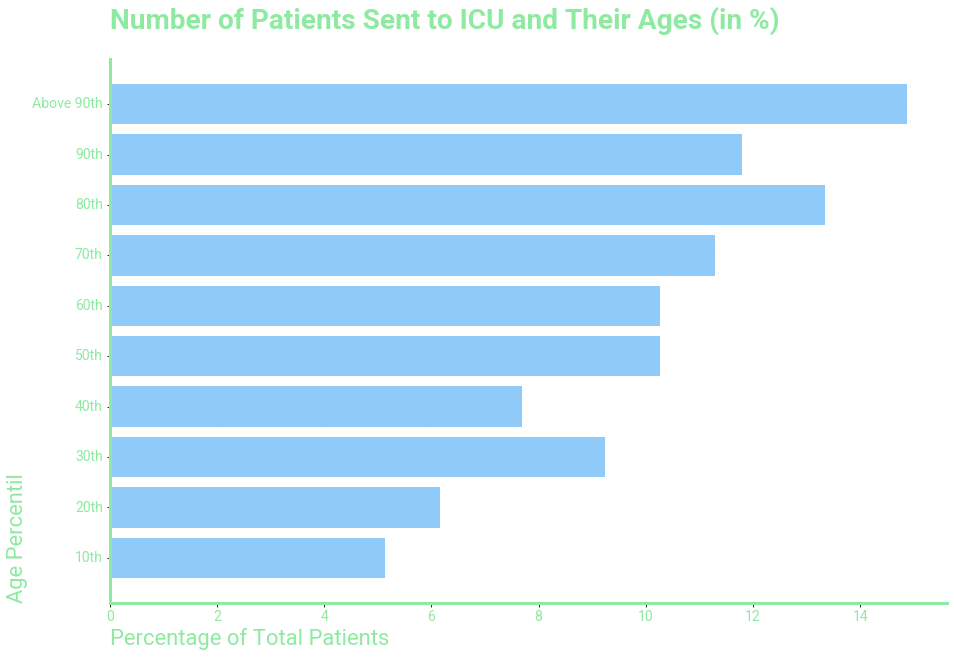

<IPython.core.display.Javascript object>

In [8]:
# Select data
index = patients.index
value = patients.values

# Sum number of patients
sum = np.sum(value)

# Create figure
figure = plt.figure()

# Create a subplot
axis = figure.subplots(1)

# Create horizontal bar plot
axis.barh(index, (value / sum) * 100, zorder=2)

# Set labels
axis.set_title("Number of Patients Sent to ICU and Their Ages (in %)")
axis.set_ylabel("Age Percentil")
axis.set_xlabel("Percentage of Total Patients")

plt.show(figure)

It's clear to see that age is a condition that worsens the symptoms of COVID-19, leading the patient to need extra care and being sent to ICU.

### Disease Grouping

In [9]:
# Getting count of patients for each disease grouping

patients = (
    dataset[dataset.icu == 1]
    .groupby("patient_visit_identifier")
    .first()[
        [
            "disease_grouping_1",
            "disease_grouping_2",
            "disease_grouping_3",
            "disease_grouping_4",
            "disease_grouping_5",
        ]
    ]
)

patients_count = patients.shape[0]
patients = patients.sum()

<IPython.core.display.Javascript object>

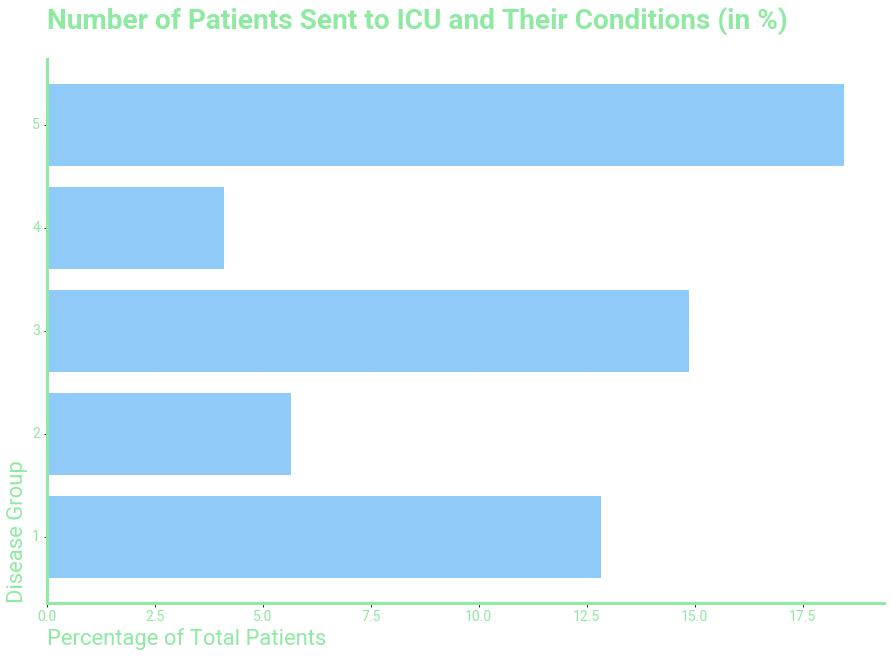

<IPython.core.display.Javascript object>

In [10]:
# Select data
index = [group[-1:] for group in patients.index]
value = patients.values

# Create figure
figure = plt.figure()

# Create a subplot
axis = figure.subplots(1)

# Create horizontal bar plot
axis.barh(index, (value / patients_count) * 100, zorder=2)

# Set labels
axis.set_title("Number of Patients Sent to ICU and Their Conditions (in %)")
axis.set_ylabel("Disease Group")
axis.set_xlabel("Percentage of Total Patients")

plt.show(figure)

To have a better idea if any of these disease groups have influence on the conditions of the patient to be sent to the ICU, I can compare with the count of patients that weren't sent to ICU.

In [11]:
# Getting count of patients for each disease grouping

columns = [
    "disease_grouping_1",
    "disease_grouping_2",
    "disease_grouping_3",
    "disease_grouping_4",
    "disease_grouping_5",
    "disease_grouping_6",
    "htn",
    "immunocompromised",
    "icu",
]

patients = dataset.groupby("patient_visit_identifier").last()[columns]

columns.remove("icu")

patients_icu = patients[patients.icu == 1][columns].sum()
patients_not_icu = patients[patients.icu == 0][columns].sum()

<IPython.core.display.Javascript object>

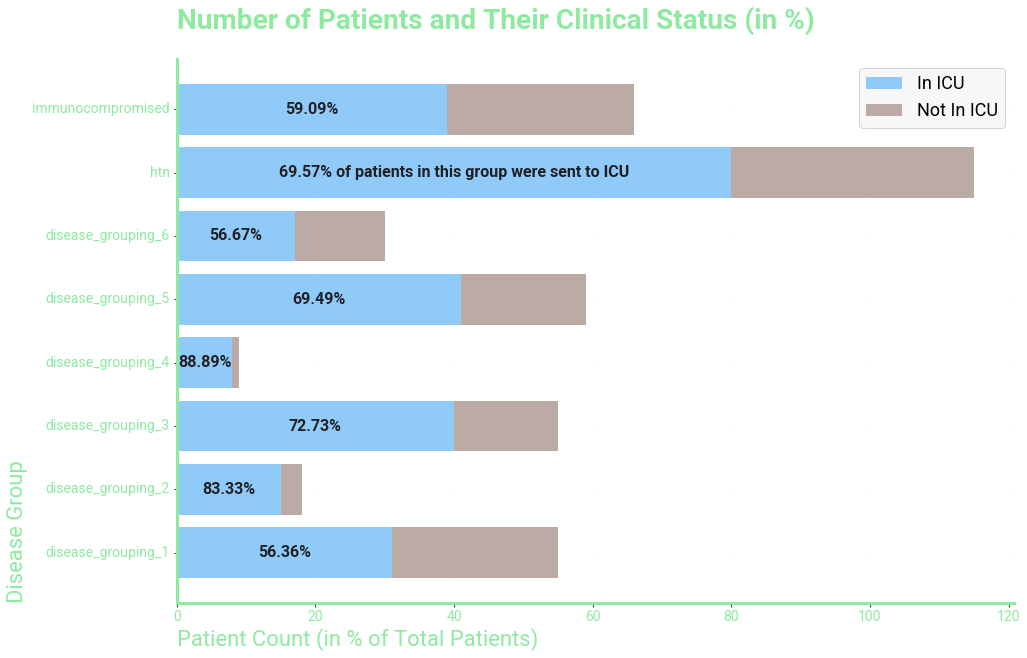

<IPython.core.display.Javascript object>

In [12]:
index = patients_icu.index

# Create a figure
figure = plt.figure()

# Create a subplot
axis = figure.subplots(1)

# Create bar plot
axis.barh(index, patients_icu.values, zorder=2, label="In ICU")
axis.barh(
    index,
    patients_not_icu.values,
    zorder=2,
    left=patients_icu.values,
    label="Not In ICU",
)

# Set labels
axis.set_title("Number of Patients and Their Clinical Status (in %)")
axis.set_ylabel("Disease Group")
axis.set_xlabel("Patient Count (in % of Total Patients)")

# Create percentage text
for i, group in enumerate(index):

    percentage = (
        (patients_icu.values[i])
        / (patients_icu.values[i] + patients_not_icu.values[i])
        * 100
    )

    axis.text(
        patients_icu.values[i] / 2,
        group,
        f"{percentage:.2f}% of patients in this group were sent to ICU"
        if i == 6
        else f"{percentage:.2f}%",
        verticalalignment="center",
        horizontalalignment="center",
        fontfamily="Roboto",
        fontsize=16,
        fontweight="bold",
        color="#202024",
    )

plt.legend()

plt.show(figure)

I can see that some of those diseases groups seem to have a significative impact to if the patient will need extra care or not. The graph above show us that more than 80% of patients within groups 2 and 4 are sent to ICU. This should be considered when diagnosing patients, to predict if they will need to be sent to ICU or not.  
**Since the data tries to keep anonymity, I don't have information to which diseases are within each group.**

### Gender

In [13]:
# Getting count of genders

# Selecting only the first entry for each unique identifier and there were sent to ICU
patients = dataset[dataset.icu == 1].groupby("patient_visit_identifier").first()

# Count patients withing age percentil
patients = patients["gender"].value_counts().sort_index()

# Create label for each gender
gender = {0: "Gender 1", 1: "Gender 2"}

<IPython.core.display.Javascript object>

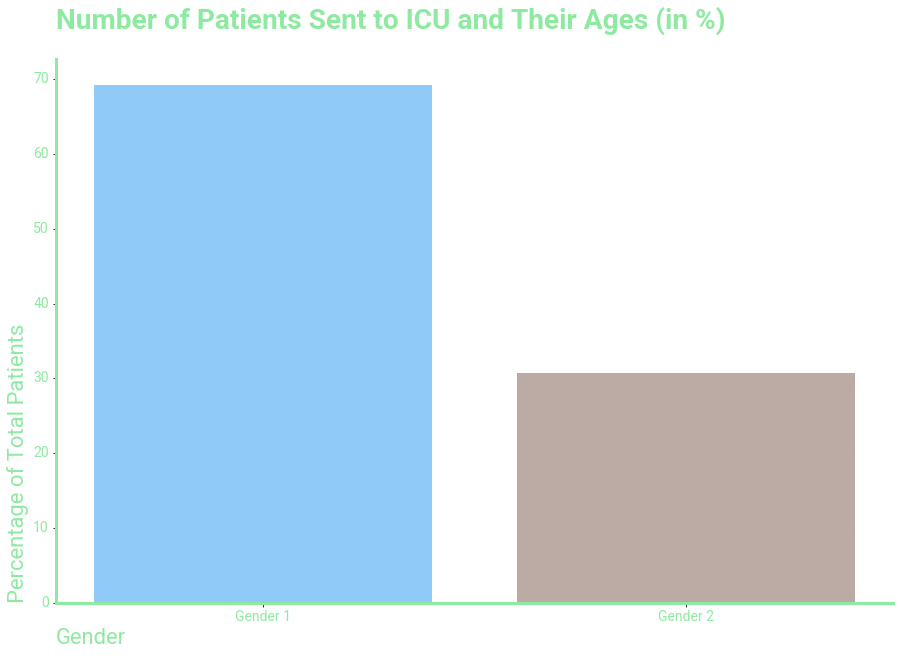

<IPython.core.display.Javascript object>

In [14]:
# Select data
index = [gender[gender_num] for gender_num in patients.index]
value = patients.values

# Sum patients count
sum = np.sum(value)

# Create a figure
figure = plt.figure()

# Create a subplot
axis = figure.subplots(1)

# Create a bar plot
axis.bar(index[0], (value[0] / sum) * 100, zorder=2)
axis.bar(index[1], (value[1] / sum) * 100, zorder=2)

# Set labels
axis.set_title("Number of Patients Sent to ICU and Their Ages (in %)")
axis.set_xlabel("Gender")
axis.set_ylabel("Percentage of Total Patients")

plt.show(figure)

According to some researches, men are dying more than women of COVID-19 [[5]](#ref-5). The ratio I encountered here, is close to one survey done in China last year [[6]](#ref-6):

> In the largest survey of 72,314 suspected or confirmed cases of COVID-19 in China (men, 63.8% of cases; women, 36.2% of cases), the case-fatality ratio was higher among men (2.8%) than among women (1.7%)

## Further Investigating

To further investigate conditions that may be critical to patients' health, I can check results of exams done to them and check if any anomaly are seem to those sent to ICU. For that, I will be randomly selecting five people that were sent to ICU and five people that were not sent to ICU and comparing their evolution.

In [15]:
n = 5

# Select patients that were sent to ICU
# Window is select to ABOVE_12 so I can study it's evolution
patients_icu_identifier = (
    dataset.query("icu == 1 and window == 'ABOVE_12'")["patient_visit_identifier"]
    .sample(n, random_state=123)
    .values
)

patients_icu = dataset.query("patient_visit_identifier in @patients_icu_identifier")

# Select patients that were not sent to ICU
# Window is select to ABOVE_12 so I can study it's evolution
patients_not_icu_identifier = (
    dataset.query("icu == 0 and window == 'ABOVE_12'")["patient_visit_identifier"]
    .sample(n, random_state=123)
    .values
)

patients_not_icu = dataset.query(
    "patient_visit_identifier in @patients_not_icu_identifier"
)

<IPython.core.display.Javascript object>

In [16]:
# Define function to plot graphs
def plot_column(column, y_label, x_label, title_top, title_bottom):
    figure, axis = plt.subplots(2, 1, sharex=True, sharey=True)
    plt.subplots_adjust(hspace=0.4)

    for patient in patients_icu_identifier:

        query = patients_icu.query("patient_visit_identifier == @patient")
        query = query.sort_index().set_index("window")[column]

        index = query.index.str.replace("_", " ")
        values = query.values

        axis[0].plot(index, values, zorder=2)

    text = True

    for patient in patients_icu_identifier:

        query = patients_icu.query("patient_visit_identifier == @patient")
        query = query.sort_index().set_index("window")
        query = query.query("icu == 1")[column]

        axis[0].scatter(
            query.index[0].replace("_", " "), query.values[0], zorder=3, s=80
        )

        if text and str(query.values[0]) != "nan":
            axis[0].text(
                query.index[0].replace("_", " "),
                query.values[0],
                "Sent to ICU   ",
                horizontalalignment="right",
                verticalalignment="center",
                fontfamily="Roboto",
                fontsize=12,
                color="#F5F5F5",
                fontweight="bold",
                zorder=5,
            )

            text = False

    for patient in patients_not_icu_identifier:

        query = patients_not_icu.query("patient_visit_identifier == @patient")
        query = query.sort_index().set_index("window")[column]

        index = query.index.str.replace("_", " ")
        values = query.values

        axis[1].plot(index, values, zorder=2)

    axis[0].axhline(0, color="#e57373", zorder=1, alpha=0.2, linestyle="--")
    axis[1].axhline(0, color="#e57373", zorder=1, alpha=0.2, linestyle="--")

    axis[0].set_title(title_top)
    axis[1].set_title(title_bottom)

    axis[1].set_ylabel(y_label)
    axis[1].set_xlabel(x_label)

    return figure, axis

<IPython.core.display.Javascript object>

## Blood Pressure (Diastolic)

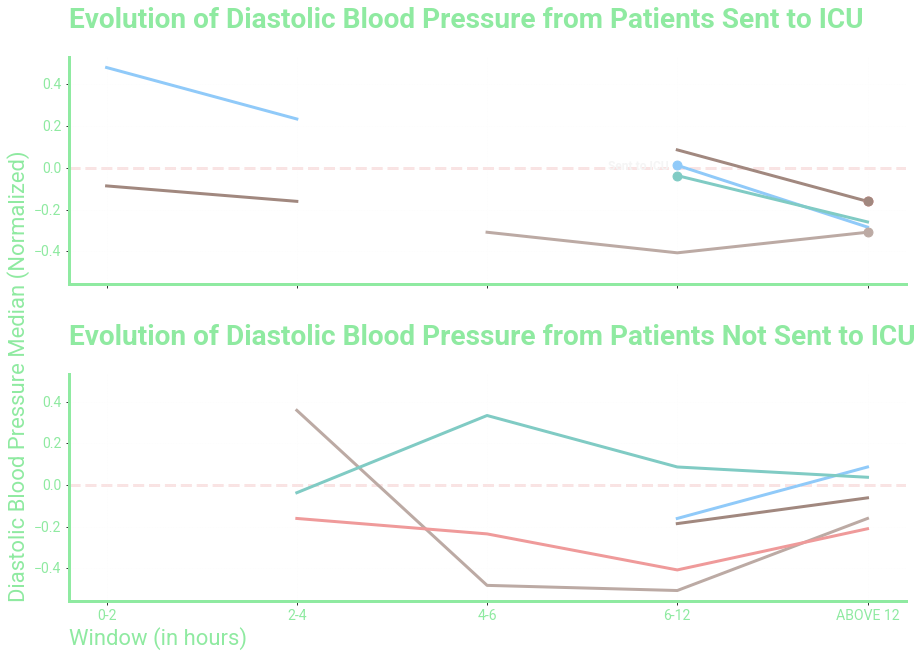

<IPython.core.display.Javascript object>

In [17]:
figure, axis = plot_column(
    column="bloodpressure_diastolic_median",
    y_label="Diastolic Blood Pressure Median (Normalized)",
    x_label="Window (in hours)",
    title_top="Evolution of Diastolic Blood Pressure from Patients Sent to ICU",
    title_bottom="Evolution of Diastolic Blood Pressure from Patients Not Sent to ICU",
)

plt.show(figure)

## Blood Pressure (Sistolic)

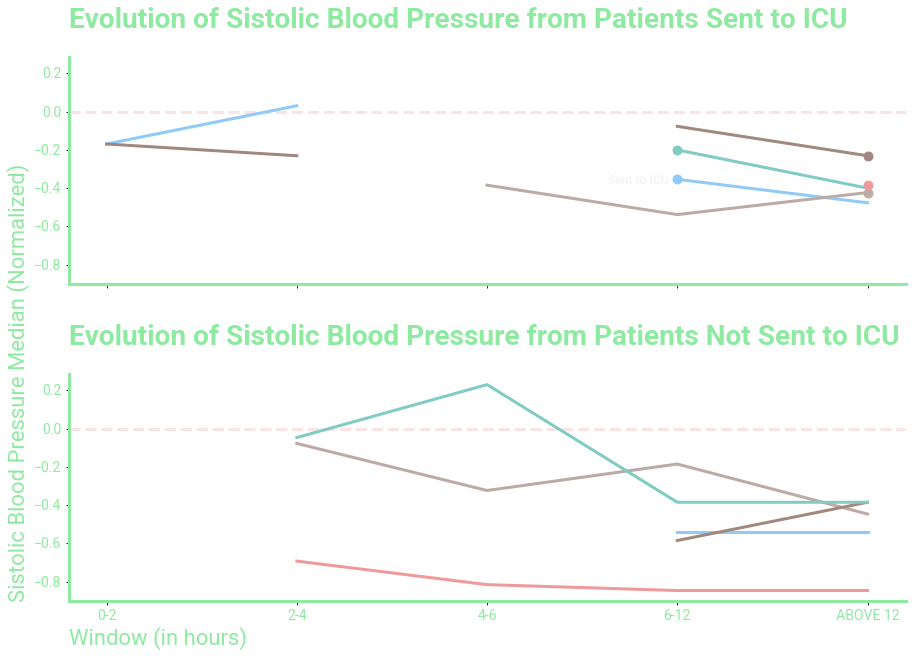

<IPython.core.display.Javascript object>

In [18]:
figure, axis = plot_column(
    column="bloodpressure_sistolic_median",
    y_label="Sistolic Blood Pressure Median (Normalized)",
    x_label="Window (in hours)",
    title_top="Evolution of Sistolic Blood Pressure from Patients Sent to ICU",
    title_bottom="Evolution of Sistolic Blood Pressure from Patients Not Sent to ICU",
)

plt.show(figure)

It seems like neither the Diastolic Blood Pressure or the Sistolic Blood Pressure aren't key factors to determine if a person will need extra care or not. Even though in the graph on top, the lines seem closer to each other, for both cases, the blood pressure can be related to other parameters, such as age. I can compare the ages of the patients in study below:

In [19]:
print("Age of Patients in ICU:")
display(patients_icu.groupby("patient_visit_identifier").first()["age_percentil"])

print("-------------\n")

print("Age of Patients not in ICU:")
display(patients_not_icu.groupby("patient_visit_identifier").first()["age_percentil"])

Age of Patients in ICU:


patient_visit_identifier
13     50th
152    60th
256    40th
307    70th
358    70th
Name: age_percentil, dtype: object

-------------

Age of Patients not in ICU:


patient_visit_identifier
7            20th
50     Above 90th
80           20th
167          20th
333          90th
Name: age_percentil, dtype: object

<IPython.core.display.Javascript object>

## Heart Rate

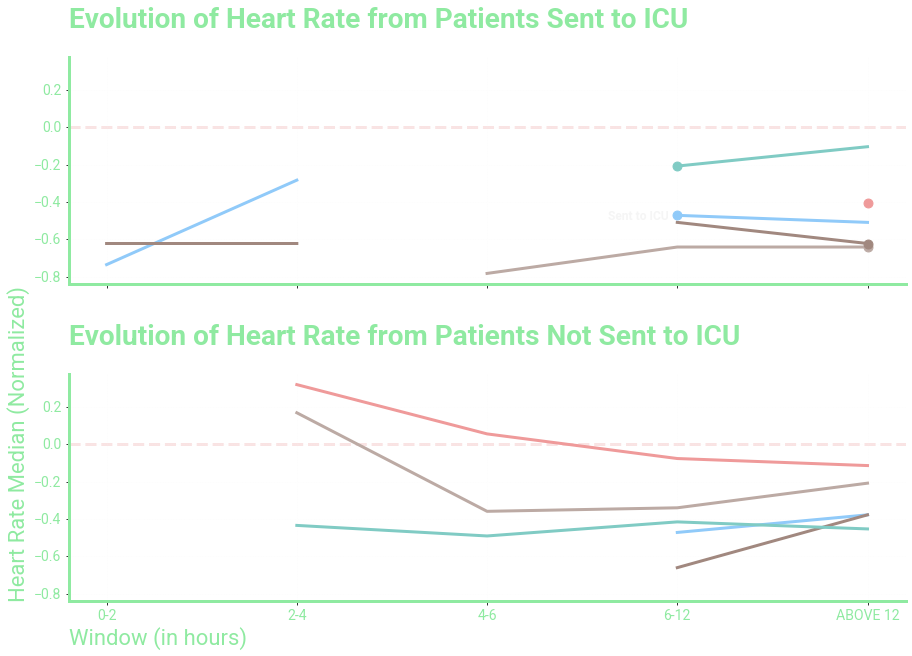

<IPython.core.display.Javascript object>

In [20]:
figure, axis = plot_column(
    column="heart_rate_median",
    y_label="Heart Rate Median (Normalized)",
    x_label="Window (in hours)",
    title_top="Evolution of Heart Rate from Patients Sent to ICU",
    title_bottom="Evolution of Heart Rate from Patients Not Sent to ICU",
)

plt.show(figure)

### Oxygen Saturation 

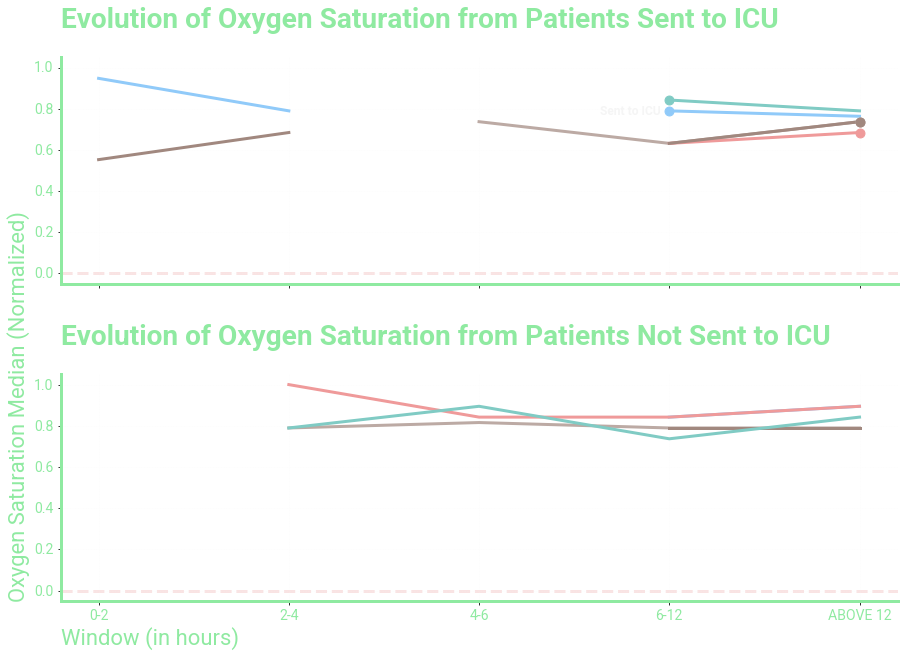

<IPython.core.display.Javascript object>

In [21]:
figure, axis = plot_column(
    column="oxygen_saturation_median",
    y_label="Oxygen Saturation Median (Normalized)",
    x_label="Window (in hours)",
    title_top="Evolution of Oxygen Saturation from Patients Sent to ICU",
    title_bottom="Evolution of Oxygen Saturation from Patients Not Sent to ICU",
)

plt.show(figure)

### Respiratory Rate

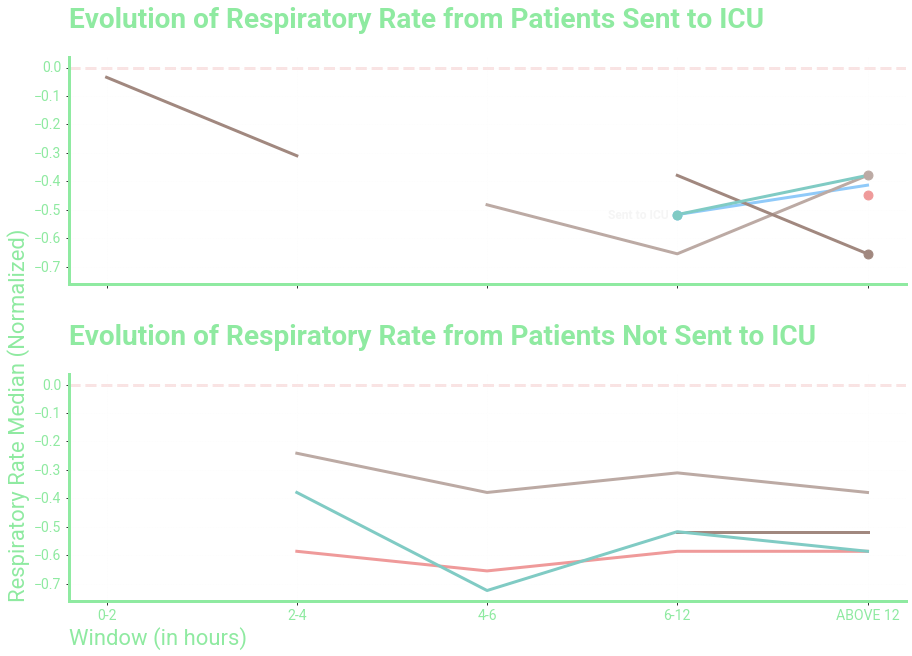

<IPython.core.display.Javascript object>

In [22]:
figure, axis = plot_column(
    column="respiratory_rate_median",
    y_label="Respiratory Rate Median (Normalized)",
    x_label="Window (in hours)",
    title_top="Evolution of Respiratory Rate from Patients Sent to ICU",
    title_bottom="Evolution of Respiratory Rate from Patients Not Sent to ICU",
)

plt.show(figure)

### Temperature

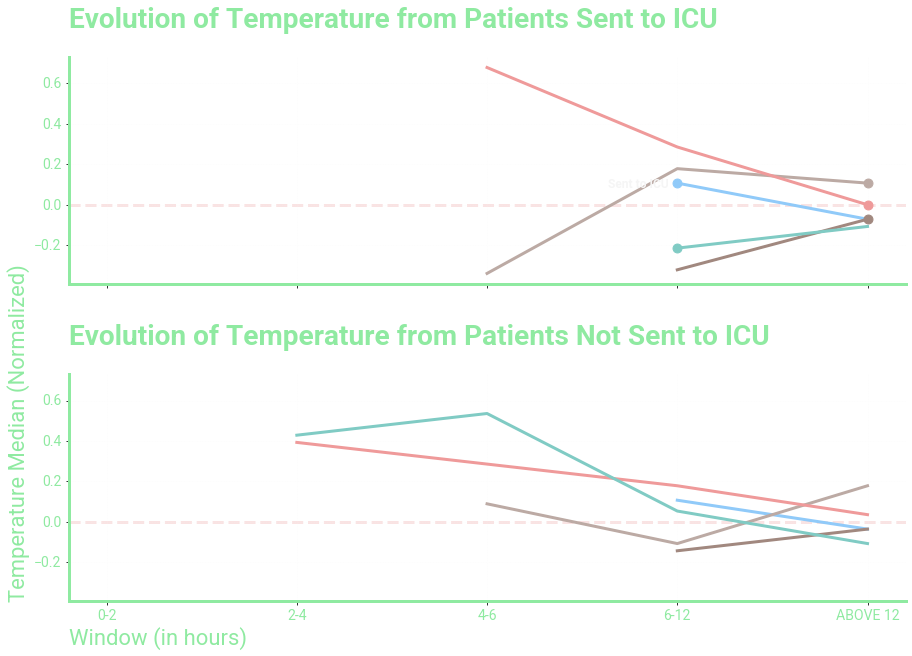

<IPython.core.display.Javascript object>

In [23]:
figure, axis = plot_column(
    column="temperature_median",
    y_label="Temperature Median (Normalized)",
    x_label="Window (in hours)",
    title_top="Evolution of Temperature from Patients Sent to ICU",
    title_bottom="Evolution of Temperature from Patients Not Sent to ICU",
)

plt.show(figure)

All the data above show that no major difference was seen between those that were sent to the ICU and those who were not. In this case, I studied the evolution of exams results in time, to see if there were any indication that patients sent to ICU could show a steeper curve of worsening, in comparison to those that were sent.

To better check if any difference exists, I decided to plot a violin plot comparing all the exam results of those two groups. I decided that it's important to check if any major difference exists to select variables for our model. If we don't do any analysis to our data and context, I could end up with *spurious correlations* that would hurt the final model and prediction.

Some researches[[7]](#ref_7)[[8]](#ref_8) show that for high dimensional datasets, there are high chances of *spurious correlations*, but the importance here is "Correlation is not causation". It's important then to study the context, select the most suitable variables to the context, to avoid giving too much importance to non-causal variables.

## Overall Analysis

In [24]:
columns = [column for column in dataset.columns if "median" in column]

columns = sorted(columns)

patients_icu = dataset.query("icu == 1").dropna()[columns]
patients_not_icu = dataset.query("icu == 0").dropna()[columns]

<IPython.core.display.Javascript object>

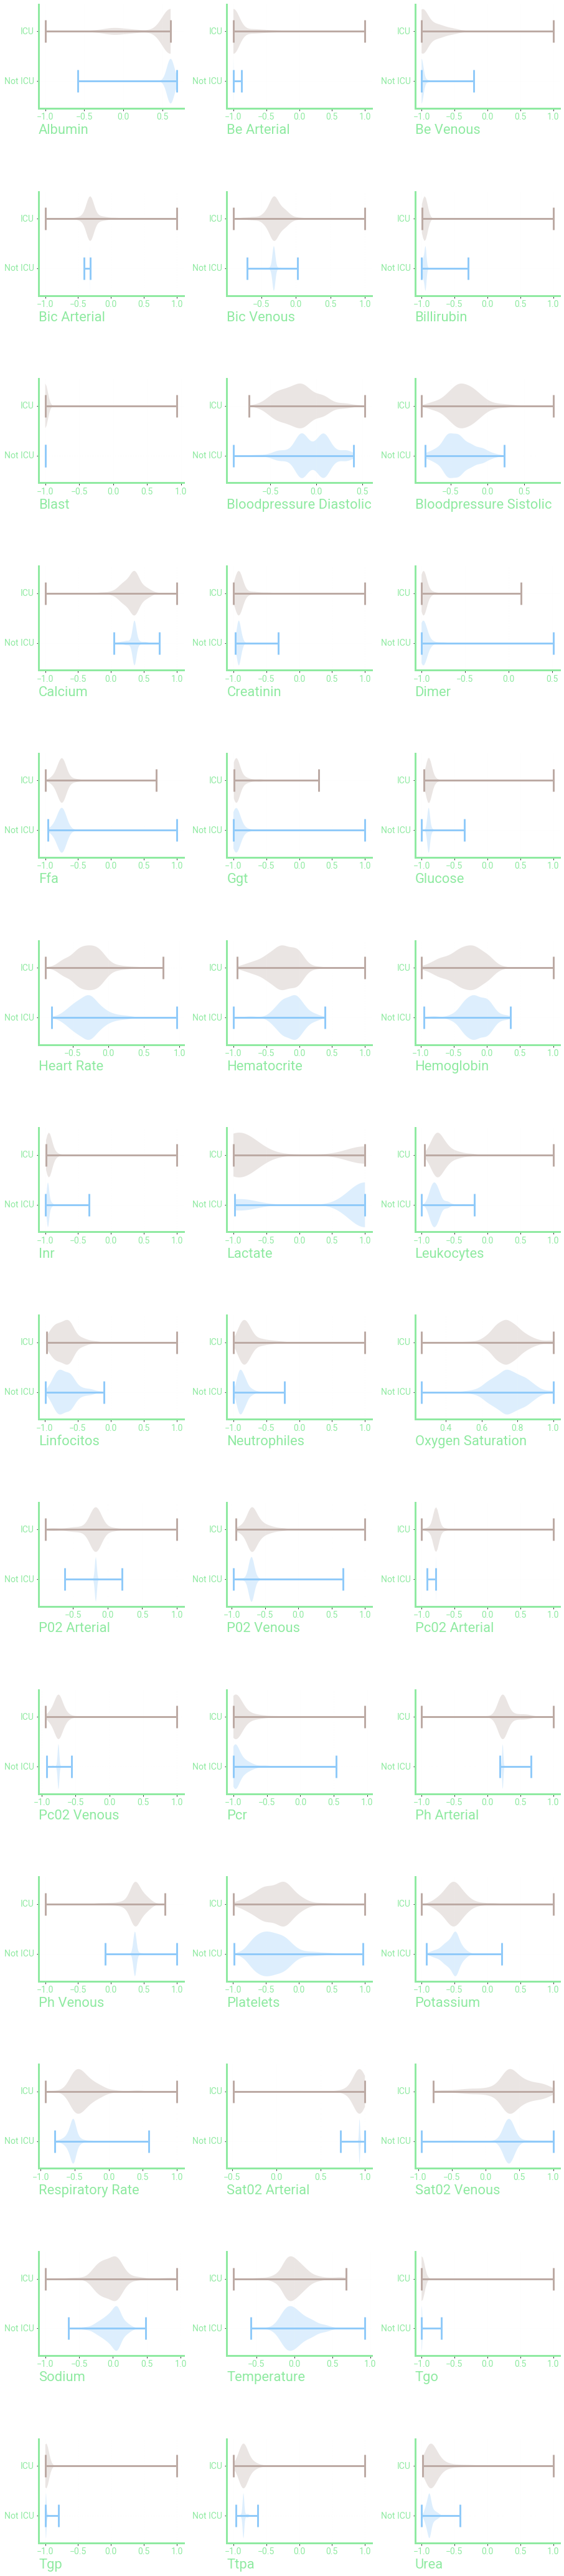

<IPython.core.display.Javascript object>

In [26]:
number_of_columns = 3
number_of_rows = int(np.ceil(patients_icu.shape[1] / number_of_columns))

figure, axis = plt.subplots(
    number_of_rows, number_of_columns, gridspec_kw={"hspace": 0.8, "wspace": 0.3}
)
figure.set_size_inches(figure.get_size_inches()[0], 75)

x = y = 0

for index, column in enumerate(columns):

    if y >= number_of_columns:
        y = 0
        x = x + 1

    axis[x, y].violinplot(
        patients_not_icu[column].values, vert=False, positions=[0], widths=0.9
    )
    axis[x, y].violinplot(
        patients_icu[column].values, vert=False, positions=[1], widths=0.9
    )

    axis[x, y].set_xlabel(" ".join(column.split("_")[0:-1]).title())

    axis[x, y].set_yticks([0, 1])
    axis[x, y].set_yticklabels(["Not ICU", "ICU"])

    y = y + 1

It's hard to tell any major difference from both groups in all these variables. 

# References

<a id="ref_1"></a>[1] 'COVID-19'  
**Wikipedia**  
Available at https://en.wikipedia.org/wiki/COVID-19 (Accessed: 2021-04-06)
<br><br>
<a id="ref_2"></a>[2] 'Treatment and management of COVID-19'  
**Wikipedia**  
Available at https://en.wikipedia.org/wiki/Treatment_and_management_of_COVID-19 (Accessed: 2021-04-06)
<br><br>
<a id="ref_3"></a>[3] 'Certain Medical Conditions and Risk for Severe COVID-19 Illness'  
**Centers for Disease Control and Prevention**  
Available at https://www.cdc.gov/coronavirus/2019-ncov/need-extra-precautions/people-with-medical-conditions.html (Accessed : 2021-04-06)
<br><br>
<a id="ref_4"></a>[4]  'COVID-19 - Clinical Data to assess diagnosis'  
**Kaggle**  
Available at https://www.kaggle.com/S%C3%ADrio-Libanes/covid19 (Accessed: 2021-04-06)
<br><br>
<a id="ref_5"></a>[5]  'Men and COVID-19: A Biopsychosocial Approach to Understanding Sex Differences in Mortality and Recommendations for Practice and Policy Interventions'  
**Derek M. Griffith, PhD; Garima Sharma, MD; Christopher S. Holliday, PhD, MPH; Okechuku K. Enyia, MPH; Matthew Valliere, MPA; Andrea R. Semlow, MS, MPH; Elizabeth C. Stewart, DrPH, MSPH; Roger Scott Blumenthal, MD**  
Published: 2020-07-16  
Available at https://www.cdc.gov/pcd/issues/2020/20_0247.htm (Accessed: 2021-04-06)
<br><br>
<a id="ref_6"></a>[6]  'Epidemiology Working Group for NCIP Epidemic Response, Chinese Center for Disease Control and Prevention.'  
**Zhonghua Liu Xing Bing Xue Za Zhi**  
Published: 2020-02-10  
Available at https://pubmed.ncbi.nlm.nih.gov/32064853/ (Accessed: 2021-04-06)
<br><br>
<a id="ref_7"></a>[7] "The Deluge of Spurious Correlations in Big Data"  
**Calude, Cristian & Longo, Giuseppe**  
Published: 2017  
Available at https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4236847/ (Accessed: 2021-04-30)
<br><br>
<a id="ref_8"></a>[8] "Challenges of Big Data Analysis"  
**Fan J, Han F, Liu H.**  
Published: 2014 Jun  
Available at: https://www.researchgate.net/publication/297656557_The_Deluge_of_Spurious_Correlations_in_Big_Data